# **Internity Final Project** - SENTIMENT ANALYSIS (Large Movie Review Data)

Dataset - http://ai.stanford.edu/~amaas/data/sentiment/

*Created By - Akshar Rastogi, Abu Qais, Amisha Gangwar*





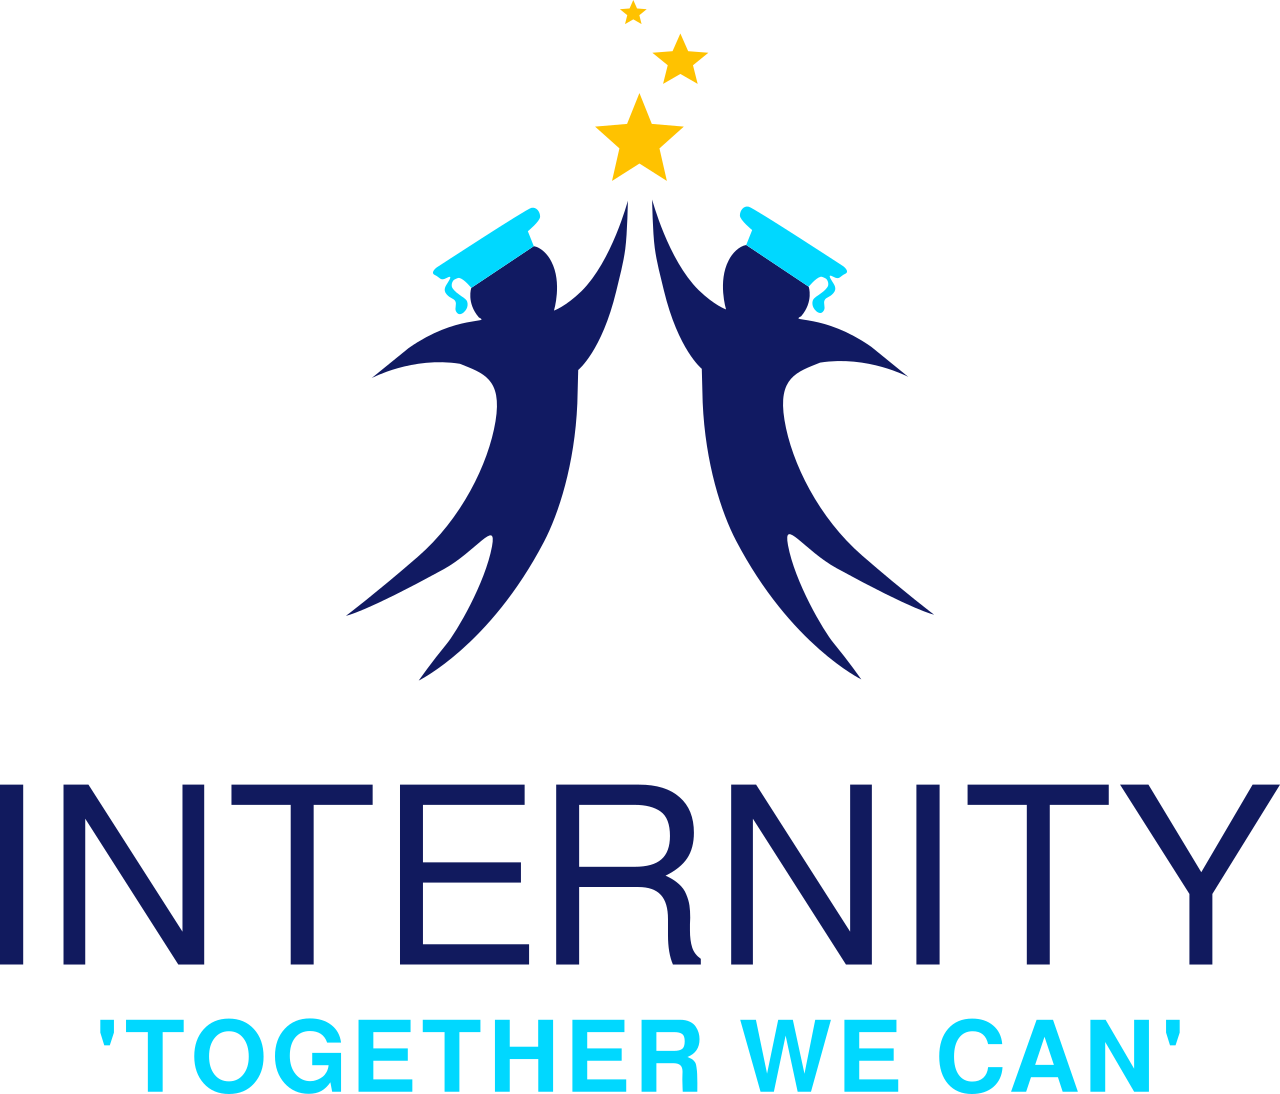




# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
import plotly

# **Loading Data** 

In [ ]:
df_neg = pd.read_csv('/content/drive/MyDrive/data/negativereviews.csv')
df_pos = pd.read_csv('/content/drive/MyDrive/data/positivereviews.csv')

# **Data Preprocessing**

In [ ]:
df_pos['Index'] = df_pos['Index'] +12550

In [ ]:
df_pos.columns

Index(['Unnamed: 0', 'Index', 'Rating', 'Label', 'Reviews'], dtype='object')

In [ ]:
df_pos = df_pos.drop(columns='Unnamed: 0')

In [ ]:
df_pos

,Index,Rating,Label,Reviews
0,23999,10,Positive,this has by far been one of the most beautiful...
1,24247,10,Positive,This Film was really eye-opening. I have seen ...
2,24130,10,Positive,As a another reviewer states Hanna's War is an...
3,23934,7,Positive,The dazzling seventeen-minute dance sequence o...
4,24366,8,Positive,That was great fun! I never read those Chester...
...,...,...,...,...
12515,13541,7,Positive,I really am shocked to see the number of revie...
12516,13123,9,Positive,I've always enjoyed films that depict life as ...
12517,12978,7,Positive,"Two women, sick of their controlling husbands,..."
12518,13302,7,Positive,Four teenage girls in a suburb of Los Angeles ...


In [ ]:

df = pd.concat([df_neg, df_pos])

In [ ]:
df

,Unnamed: 0,Index,Rating,Label,Reviews
0,0.0,11491,3,Negative,This is a fascinating film--especially to old ...
1,1.0,11665,3,Negative,"I enjoyed the movie very much, emotionally, in..."
2,2.0,11616,4,Negative,"I did not enjoy the film, Joshua, at all. Perh..."
3,3.0,11578,1,Negative,"Perhaps the biggest waste of production time, ..."
4,4.0,11301,3,Negative,Nothing will ruin a movie as much as the combi...
...,...,...,...,...,...
12515,NaN,13541,7,Positive,I really am shocked to see the number of revie...
12516,NaN,13123,9,Positive,I've always enjoyed films that depict life as ...
12517,NaN,12978,7,Positive,"Two women, sick of their controlling husbands,..."
12518,NaN,13302,7,Positive,Four teenage girls in a suburb of Los Angeles ...


In [ ]:
df = df.drop(columns='Unnamed: 0')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25070 entries, 0 to 12519
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Index    25070 non-null  int64 
 1   Rating   25070 non-null  int64 
 2   Label    25070 non-null  object
 3   Reviews  25070 non-null  object
dtypes: int64(2), object(2)
memory usage: 979.3+ KB


In [ ]:
df2 = df

In [ ]:
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df

,Index,Rating,Label,Reviews
0,10069,1,Negative,This is an awful film. Yea the girls are prett...
1,12933,10,Positive,This film captured my heart from the very begi...
2,12774,10,Positive,The Sunshine Boys is one of my favorite feel g...
3,12711,8,Positive,This silly movie is really fun for the younger...
4,7598,1,Negative,It must have been excruciating to attend the d...
...,...,...,...,...
25065,13749,10,Positive,This is the most compelling and excellent perf...
25066,13494,10,Positive,You could stage a version of Charles Dickens' ...
25067,12787,10,Positive,Growing up in a multi racial neighborhood back...
25068,24786,10,Positive,I saw this movie in 1959 when I was 11 years o...


In [ ]:
df.groupby("Label")["Label"].count()

Label
Negative    12550
Positive    12520
Name: Label, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25070 entries, 0 to 25069
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Index    25070 non-null  int64 
 1   Rating   25070 non-null  int64 
 2   Label    25070 non-null  object
 3   Reviews  25070 non-null  object
dtypes: int64(2), object(2)
memory usage: 783.6+ KB


In [ ]:
df.describe()

,Index,Rating
count,25070.000000,25070.000000
mean,12519.668608,5.473714
std,7233.090192,3.466911
min,0.000000,1.000000
25%,6253.250000,2.000000
50%,12484.500000,4.000000
75%,18781.750000,9.000000
max,25049.000000,10.000000


# **Rating vs Label**

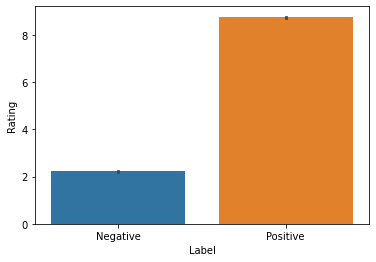

In [ ]:
sns.barplot(y=df['Rating'], x=df['Label'])

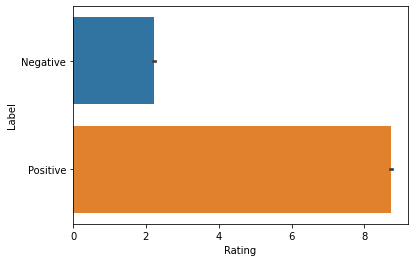

In [ ]:
sns.barplot(x=df['Rating'], y=df['Label'])

In [ ]:
aclimdb = df

In [ ]:
aclimdb['Label'].describe()

count        25070
unique           2
top       Negative
freq         12550
Name: Label, dtype: object

In [ ]:
aclimdb['Label'].value_counts()

Negative    12550
Positive    12520
Name: Label, dtype: int64

In [ ]:
aclimdb.shape

(25070, 4)

In [ ]:
a =25070/4
print(3*a-2.5)

18800.0


In [ ]:
aclimdb

,Index,Rating,Label,Reviews
0,10069,1,Negative,This is an awful film. Yea the girls are prett...
1,12933,10,Positive,This film captured my heart from the very begi...
2,12774,10,Positive,The Sunshine Boys is one of my favorite feel g...
3,12711,8,Positive,This silly movie is really fun for the younger...
4,7598,1,Negative,It must have been excruciating to attend the d...
...,...,...,...,...
25065,13749,10,Positive,This is the most compelling and excellent perf...
25066,13494,10,Positive,You could stage a version of Charles Dickens' ...
25067,12787,10,Positive,Growing up in a multi racial neighborhood back...
25068,24786,10,Positive,I saw this movie in 1959 when I was 11 years o...


In [ ]:
X= aclimdb['Reviews']
y = aclimdb['Label']

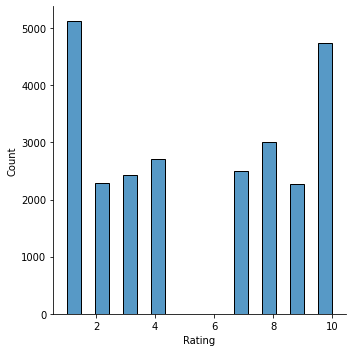

In [ ]:
sns.displot(aclimdb['Rating'])

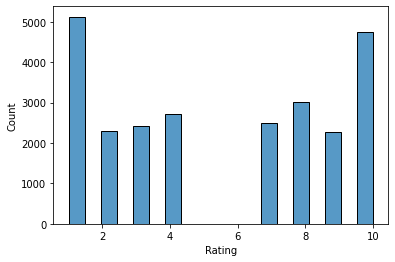

In [ ]:
sns.histplot(aclimdb['Rating'])

# **Splitting Dataset into Training and Test sets**

In [ ]:
(train_reviews, test_reviews, train_sentiments, test_sentiments) = train_test_split(X, y , random_state=1)

In [ ]:
train_reviews.shape

(18802,)

In [ ]:
train_reviews = train_reviews.sample(frac=1).reset_index(drop=True)

In [ ]:
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(18802,) (18802,)
(6268,) (6268,)


# **More Data Preprocessing**

1.   Text Normalization reducing the randomness of text hence increasing the efficiency.
2.  Removing html strips and noise text.
3.  Removing the special charecters (they also generate noise in our data).
4. TEXT STEMMING
5. Removing the stopwords





# **Text Normalization reducing the randomness of text hence increasing the efficiency.**

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')

In [ ]:
stopword_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# **Removing html strips and noise text**



In [ ]:
#removing html strips
def remove_html(txt):
  soup = BeautifulSoup(txt, 'html.parser')
  return soup.get_text()

#removing the square brackets
def remove_square_brackets(txt):
  return re.sub('\[[^]]*\]', '', txt)  

#remove noisy text
def denoise(txt):
  txt = remove_html(txt)
  txt = remove_square_brackets(txt)
  return txt  

#X= aclimdb['Review]
X = X.apply(denoise)
X_denoise = X

In [ ]:
X

0        This is an awful film. Yea the girls are prett...
1        This film captured my heart from the very begi...
2        The Sunshine Boys is one of my favorite feel g...
3        This silly movie is really fun for the younger...
4        It must have been excruciating to attend the d...
                               ...                        
25065    This is the most compelling and excellent perf...
25066    You could stage a version of Charles Dickens' ...
25067    Growing up in a multi racial neighborhood back...
25068    I saw this movie in 1959 when I was 11 years o...
25069    While being a great James Arness western, this...
Name: Reviews, Length: 25070, dtype: object

# **Removing the special charecters (they also generate noise in our data).**

In [ ]:
def remove_special_charecters(txt, remove_digits=True):
  pattern =r'[^a-zA-z0-9\s]'
  txt = re.sub(pattern, '', txt)
  return txt

X = X.apply(remove_special_charecters)  
X_remove_special_charecters = X

In [ ]:
X

0        This is an awful film Yea the girls are pretty...
1        This film captured my heart from the very begi...
2        The Sunshine Boys is one of my favorite feel g...
3        This silly movie is really fun for the younger...
4        It must have been excruciating to attend the d...
                               ...                        
25065    This is the most compelling and excellent perf...
25066    You could stage a version of Charles Dickens A...
25067    Growing up in a multi racial neighborhood back...
25068    I saw this movie in 1959 when I was 11 years o...
25069    While being a great James Arness western this ...
Name: Reviews, Length: 25070, dtype: object

# **TEXT STEMMING** - in which the prefix and suffix are sliced out from a word. 

In [ ]:
def text_stemmer(txt):
  ps = nltk.PorterStemmer()
  txt = ''.join([ps.stem(word) for word in txt.split()])
  return txt
  X = X.apply(text_stemmer)
  X_text_stemmer = X

In [ ]:
X

0        This is an awful film Yea the girls are pretty...
1        This film captured my heart from the very begi...
2        The Sunshine Boys is one of my favorite feel g...
3        This silly movie is really fun for the younger...
4        It must have been excruciating to attend the d...
                               ...                        
25065    This is the most compelling and excellent perf...
25066    You could stage a version of Charles Dickens A...
25067    Growing up in a multi racial neighborhood back...
25068    I saw this movie in 1959 when I was 11 years o...
25069    While being a great James Arness western this ...
Name: Reviews, Length: 25070, dtype: object

# **Removing the stopwords**

In [ ]:
stop = set(stopwords.words('english'))
print(stop)

{'couldn', 'wasn', 'nor', 'for', 'myself', "she's", "isn't", 'if', 'few', 'doesn', 'off', "hasn't", 'isn', 'any', 'which', 'by', 'there', 'over', 'or', 've', 'both', 'being', 'ma', 'yourself', 'his', 'so', 'that', 'shan', 'ourselves', 'should', 'doing', 'why', 'hadn', 'then', 'but', 'theirs', "haven't", 'my', 'him', 'ain', 'just', "aren't", "you're", "it's", 'between', 'in', 'shouldn', "wouldn't", 'and', 'ours', 'wouldn', 'been', "weren't", 'into', 'when', 'who', "needn't", 'only', "won't", 'o', 'have', 'himself', 'd', 'an', 'again', 'it', 'had', "didn't", 'with', 'do', 'was', 'were', 'your', 'below', 'them', 'hasn', 'y', 'such', "shan't", 'where', 'has', "that'll", 'from', 'the', 'more', "wasn't", 'before', 'he', 'about', 'against', "hadn't", 'no', 'is', 'we', 'they', 'haven', 'under', 'out', 'further', "you'll", 'own', 'you', 'did', 'of', "mustn't", 'itself', 'whom', 'what', 'same', 'me', 't', 'her', 'll', 'down', 'herself', 'i', 'themselves', 'are', 'all', 'some', 'very', "mightn't"

In [ ]:
def stopwords(txt , is_lower_case=False):
  tokens = tokenizer.tokenize(txt)
  tokens = [token.strip() for token in tokens]
  if is_lower_case:
    filtered_tokens = [token for token in tokens if token not in stopword_list]
  else:
    filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
  return filtered_text
#Apply function on review columnX
X = X.apply(stopwords)
X_stopwords = X

In [ ]:
X

0        awful film Yea girls pretty good plot cowboy g...
1        film captured heart beginning hearing Quincy J...
2        Sunshine Boys one favorite feel good movies fi...
3        silly movie really fun younger audiences heros...
4        must excruciating attend dailies shooting cont...
                               ...                        
25065    compelling excellent performance Robert Taylor...
25066    could stage version Charles Dickens Christmas ...
25067    Growing multi racial neighborhood back 20s 30s...
25068    saw movie 1959 11 years old drivein theater fa...
25069    great James Arness western film gone worst Ala...
Name: Reviews, Length: 25070, dtype: object

In [ ]:
test_reviews

4502     You may say to yourself, "Don Johnson as Elvis...
9371     A reporter, Craig Milford, who works for The J...
13245    To anyone who might think this show isn't for ...
20851    Sinnui yauman, is without a doubt one of the b...
22575    I can't believe people are looking for a plot ...
                               ...                        
13876    What the F*@# was this I just watched? Steven ...
6103     A country-boy Aussie-Rules player (Mat) goes t...
1416     Those engaging the movie camera so early in th...
21668    I already know that critics and some audiences...
536      Not since Caligula have I considered turning o...
Name: Reviews, Length: 6268, dtype: object

In [ ]:
stopword_list

# **Normalized Train reviews**

In [ ]:
norm_train_reviews = X[:18802]
norm_train_reviews[0]

'awful film Yea girls pretty good plot cowboy get involved Indian maiden would interesting sex didnt get way Well okay might interesting badly paced partly acted imagine close ups dancing tushes looked like big screen probably laughable TV wont even mention topless knife fight two women tied together spend whole thing chest chest Never read old west film requires liberal use fast forwardI like schlock films ridiculous reason dont go sort films tend good plot taking back seat breasts original nudie cuties called originally nudist films films touching adult industry began grow film makers either tried clever tried exploit something else order put butts seats clever ones left hacks limited talent comedies often came best humor approaching first grade level infantile harmlessly fun Something could rarely said genre cross dressed nudieThe Ramrodder looks good couple nice pieces done neither western sex filmI need watch againOf interest probably one rapist killer film played Bobby Beausoleil

In [ ]:
train_reviews

0        Forget Plan 9, this is the ultimate fiasco, a ...
1        This movie tells the tender tale of a demented...
2        This show is beautifully done. When it first c...
3        I'm not sure under what circumstances director...
4        I recently bought this movie with a bunch of o...
                               ...                        
18797    The "Trivia" page on IMDb claims the filmmaker...
18798    I love this movie because I grew up around har...
18799    Wow-this one sucks. I'm gonna sum it up as qui...
18800    This one is tough to watch -- as an earlier re...
18801    Rebar is an astronaut who goes on the world's ...
Name: Reviews, Length: 18802, dtype: object

In [ ]:
#Normalized test reviews
norm_test_reviews = X[18802:]
norm_test_reviews

18802    Set middle class neighborhood imaginary town W...
18803    mummy narrates vignettes men women sex Huh beg...
18804    Return 3th Chamber comedic sequel epic 36th Ch...
18805    performance volatile graceful Al Pacino reteam...
18806    read comments TomReynolds2004 feel jump unders...
                               ...                        
25065    compelling excellent performance Robert Taylor...
25066    could stage version Charles Dickens Christmas ...
25067    Growing multi racial neighborhood back 20s 30s...
25068    saw movie 1959 11 years old drivein theater fa...
25069    great James Arness western film gone worst Ala...
Name: Reviews, Length: 6268, dtype: object

# **Bags of worlds model convert text to numeric vectors**


In [ ]:
#countvectorizer for bag of words
cv = CountVectorizer(min_df=0, max_df=1, binary=False, ngram_range=(1,3))
#transformed train reviews
cv_train_reviews = cv.fit_transform(norm_train_reviews)
#transformed test reviews
cv_test_reviews = cv.transform(norm_test_reviews)

print(cv_train_reviews.shape)
print(cv_test_reviews.shape)

(18802, 3398115)
(6268, 3398115)


# **Term Frequency-Inverse Document Frequency model (TFIDF)**
It is used to convert text documents to matrix of tfidf features.

In [ ]:
#tfidf vectorizer
tv = TfidfVectorizer(min_df =0, max_df=1, use_idf= True, ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)

print(tv_train_reviews)
print(tv_test_reviews)

  (0, 2990659)	0.06441566264008308
  (0, 2774222)	0.06441566264008308
  (0, 3358525)	0.06441566264008308
  (0, 1087129)	0.06441566264008308
  (0, 1732339)	0.06441566264008308
  (0, 2944755)	0.06441566264008308
  (0, 2574583)	0.06441566264008308
  (0, 1993977)	0.06441566264008308
  (0, 193255)	0.06441566264008308
  (0, 1008587)	0.06441566264008308
  (0, 1819829)	0.06441566264008308
  (0, 1865766)	0.06441566264008308
  (0, 273941)	0.06441566264008308
  (0, 343458)	0.06441566264008308
  (0, 2252325)	0.06441566264008308
  (0, 1075383)	0.06441566264008308
  (0, 1589658)	0.06441566264008308
  (0, 2386703)	0.06441566264008308
  (0, 2116766)	0.06441566264008308
  (0, 2327366)	0.06441566264008308
  (0, 88364)	0.06441566264008308
  (0, 3233390)	0.06441566264008308
  (0, 2025138)	0.06441566264008308
  (0, 1086489)	0.06441566264008308
  (0, 2656458)	0.06441566264008308
  :	:
  (18801, 1926003)	0.02961744388795462
  (18801, 3390607)	0.02961744388795462
  (18801, 2750446)	0.02961744388795462
  (1880

# **Labeling the sentiment data**

In [ ]:
lb = LabelBinarizer()
#transformed sentiment data
sentiment_data = lb.fit_transform(y)
#transformed sentiment data
print(sentiment_data)
print(sentiment_data.shape)

[[0]
 [1]
 [1]
 ...
 [1]
 [1]
 [0]]
(25070, 1)


In [ ]:
#splitting sentiment data
train_sentiments = sentiment_data[:18802]
test_sentiments = sentiment_data[18802:]

In [ ]:
print(train_sentiments)
print(test_sentiments)

print(train_sentiments.shape)
print(test_sentiments.shape)

[[0]
 [1]
 [1]
 ...
 [0]
 [1]
 [0]]
[[1]
 [0]
 [1]
 ...
 [1]
 [1]
 [0]]
(18802, 1)
(6268, 1)


# **Using Multinomial Naive Bayes**

In [ ]:
print('We are using Multinomial Naive Bayes')

mnb = MultinomialNB()
mnb_bag_of_words = mnb.fit(cv_train_reviews, train_sentiments)
#fitting for bag of words
print(mnb_bag_of_words)

We are using Multinomial Naive Bayes


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


In [ ]:
#fitting for tfidf features
mnb_tfidf = mnb.fit(tv_train_reviews, train_sentiments)
print(mnb_tfidf)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


# **Prediction**

In [ ]:
mnb_bag_of_words_predict = mnb.predict(cv_test_reviews)
mnb_tfidf_predict = mnb.predict(tv_test_reviews)

# **Accuracy scores**

In [ ]:
#accuracy scores

mnb_bag_of_words_score = accuracy_score(test_sentiments, mnb_bag_of_words_predict)
mnb_tfidf_score = accuracy_score(test_sentiments, mnb_tfidf_predict)
print('mnb_bag_of_words_score:', mnb_bag_of_words_score)
print('mnb_tfidf_score:', mnb_tfidf_score)

mnb_bag_of_words_score: 0.744256541161455
mnb_tfidf_score: 0.7437779195915762


In [ ]:
Test_sentiments = test_sentiments.reshape(6268, order='C')

# **Plotting the prediction results**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

No handles with labels found to put in legend.


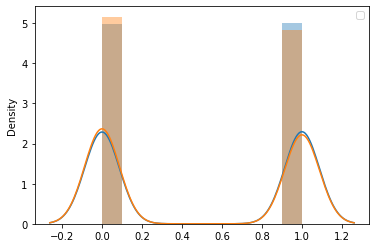

In [ ]:
sns.distplot([Test_sentiments])
sns.distplot([mnb_bag_of_words_predict])
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



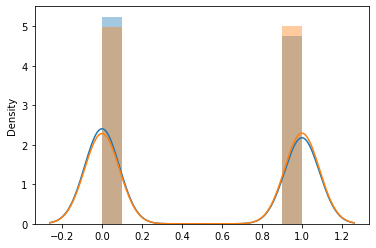

In [ ]:
#sns.countplot([mnb_bag_of_words_predict])
sns.distplot([mnb_tfidf_predict], label='Predicted')
sns.distplot([Test_sentiments], label='True')

In [ ]:
a = np.array([mnb_bag_of_words_predict])
b = np.array([test_sentiments])
c=[a]
d=[b]


In [ ]:
test_sentiments

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [ ]:
mnb_bag_of_words_predict.shape

(6268,)

In [ ]:
b.shape = (6268,)

In [ ]:
b = np.reshape(b,(6268,), order='F')

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
ts = test_sentiments

In [ ]:
ts =np.reshape(ts, (6268,), order='F')

In [ ]:

mnb_bow_pred = mnb_bag_of_words_predict

In [ ]:
mnb_bow_pred = mnb_bow_pred.tolist()

In [ ]:
print(mnb_bow_pred)

In [ ]:
ts= ts.tolist()

In [ ]:
conf_matrix = confusion_matrix(ts, mnb_bow_pred)

In [ ]:
print(classification_report(test_sentiments, mnb_bag_of_words_predict))

In [ ]:
sns.heatmap(conf_matrix, annot=True)

In [ ]:
class_report = pd.DataFrame(classification_report(test_sentiments, mnb_bag_of_words_predict, output_dict=True))

In [ ]:
sns.heatmap(class_report, annot=True, label='Classification Report')